<a href="https://colab.research.google.com/github/ukishore33/Analysing-cost-of-insurance-claims-post-an-unforeseen-event/blob/main/Insurance_Claims_Unforeseen_Events_ML_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## Reading the Train, Test Data.

In [2]:
X_train=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/X_train')

In [3]:
y_train=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/y_train')

In [4]:
X_test=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/X_test')

In [5]:
y_test=pd.read_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/Health Insurance /dataset/y_test')

## Dropping Some Columns and Rows

In [6]:
X_test = X_test.drop(X_test[X_test.isnull().any(axis=1)].index)

In [7]:
y_test =y_test.drop(index=57341)

In [8]:
X_train.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [9]:
X_test.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [10]:
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [12]:
y_train = np.array(y_train)
y_train = y_train.ravel()

In [14]:
y_test = np.array(y_test)
y_test = y_test.ravel()

## Machine Learning

Based on the problem statement, we can understand that we should do the analysis based on Regression based algorithms.

### Building the Algorithm

Linear Regression

In [15]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

KNN Algorithm

In [16]:
from sklearn.neighbors import KNeighborsRegressor

regression_model = KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)
regression_model.fit(X_train, y_train)

KNeighborsRegressor()

Decision Tree Regression

In [17]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

regression_model = RandomForestRegressor(n_estimators=100, random_state=42)
regression_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## Making Predictions

Linear Regression

In [19]:
linear_pred = linear_reg.predict(X_test)

KNN Algorithm

In [20]:
knn_pred = regression_model.predict(X_test)

Decision Tree Regression

In [21]:
dt_pred =dt_reg.predict(X_test)

Random Forest

In [22]:
y_pred = regression_model.predict(X_test)

## Model Evaluation

- Here we use mean squared error metrics and R2 Score metrics to measure the performance of the algorithm.
- Lesser the MSE and Higher the R2 Score Value Better the Performance of the algorithm

Linear Regression

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 2800387976.3235283
R-squared Score: -0.37419499928066546


KNN Algorithm

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 2927094992.6203103
R-squared Score: -0.43637215103283244


Decision Tree

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 3965681803.8660808
R-squared Score: -0.946023247380742


Random Forest

In [26]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 2927094992.6203103
R-squared Score: -0.43637215103283244


Hence, we conclude that linear regression and decision tree algorithm classifies better than other algorithm.

Mean Squared Error: 2800387976.3235283
R-squared Score: -0.37419499928066546


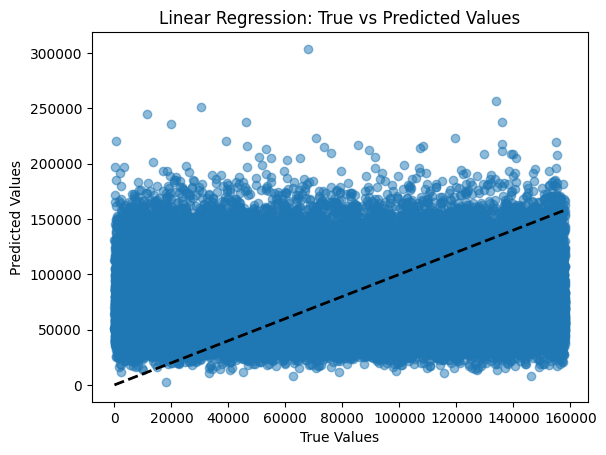

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, linear_pred)
r2 = r2_score(y_test, linear_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

plt.scatter(y_test, linear_pred,alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--' ,lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True vs Predicted Values')
plt.show()


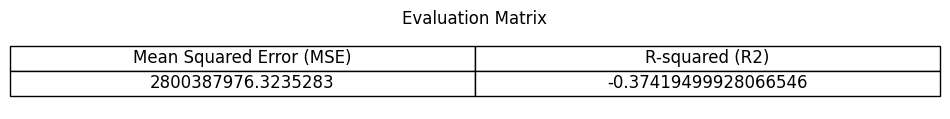

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 1))
matrix_data = [[mse, r2]]
matrix_columns = ['Mean Squared Error (MSE)', 'R-squared (R2)']
table = ax.table(cellText=matrix_data, colLabels=matrix_columns, cellLoc='center', loc='center', fontsize=12)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.axis('off')
plt.title('Evaluation Matrix')
plt.show()


Mean Squared Error: 3965681803.8660808
R-squared Score: -0.946023247380742


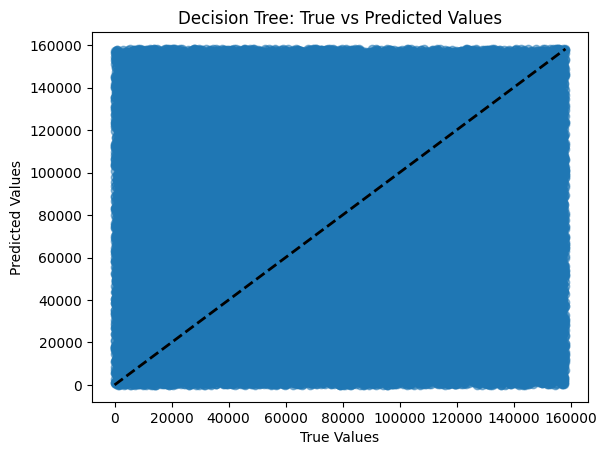

In [42]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

plt.scatter(y_test, dt_pred,alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--' ,lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: True vs Predicted Values')
plt.show()

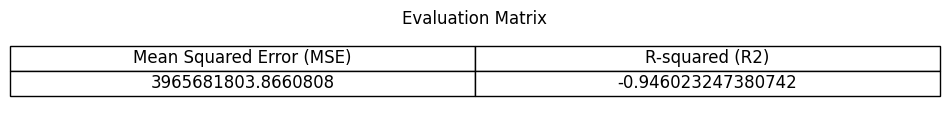

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 1))
matrix_data = [[mse, r2]]
matrix_columns = ['Mean Squared Error (MSE)', 'R-squared (R2)']
table = ax.table(cellText=matrix_data, colLabels=matrix_columns, cellLoc='center', loc='center', fontsize=12)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)
ax.axis('off')
plt.title('Evaluation Matrix')
plt.show()
